In [47]:
#%pip install kaggle

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import zipfile

In [48]:
# comando para descargar la informacion
comando = "kaggle datasets download -d manishpingale/top-anime-ranked"

#descargar la informacion
os.system(comando)

#Descomprimir el archivo

zip_path = "top-anime-ranked.zip"
extract_path = "top-anime-ranked"

with zipfile.ZipFile(zip_path,"r") as zip_ref:
    zip_ref.extractall(extract_path)

# Listar archivos extraídos
extracted_files = os.listdir(extract_path)
print("Archivos extraídos:", extracted_files)


#cargar el archivo en pandas

#Generamos una variable con uniendo el path + el nombre del archivo. "importante es una lista y se seleccioan el nombre con [0]"
csv_file = os.path.join(extract_path, extracted_files[0])

print(csv_file)

Archivos extraídos: ['Anime_rank.csv']
top-anime-ranked\Anime_rank.csv


In [49]:
type(csv_file)
df = pd.read_csv(csv_file)
df.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score
0,1,Sousou no Frieren,1,TV,28.0,Sep 2023,Mar 2024,"800,615",9.35
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,Apr 2009,Jul 2010,"3,373,923",9.09
2,3,Steins;Gate,3,TV,24.0,Apr 2011,Sep 2011,"2,584,616",9.07
3,4,Gintama°,4,TV,51.0,Apr 2015,Mar 2016,"636,631",9.06
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,Apr 2019,Jul 2019,"2,305,044",9.05


In [56]:
df["Stream type"].unique()

df["End date"].isnull().sum()
df["End date"] = pd.to_datetime(df["End date"], format="%Y-%m-%d" )
df["Start date"] = pd.to_datetime(df["Start date"], format="%Y-%m-%d")
df["Duracion"] = round((df["End date"] - df["Start date"]).dt.days / 30.42)
df["Finalizo"]=  df['End date'].apply(lambda x: 'no' if pd.isnull(x) else 'si')

df.loc[df["End date"].isnull()].head()
#df.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Duracion,Finalizo
14,15,Monogatari Series: Off & Monster Season,15,ONA,NaN,2024-07-01,NaT,"44,235",8.97,NaN,no
52,53,One Piece,53,TV,NaN,1999-10-01,NaT,"2,385,470",8.72,NaN,no
161,162,"""Oshi no Ko"" 2nd Season",162,TV,13.0,2024-07-01,NaT,"249,279",8.44,NaN,no
199,200,Doupo Cangqiong: Nian Fan,200,ONA,104.0,2022-07-01,NaT,"7,204",8.38,NaN,no
342,343,Fairy Tail: 100-nen Quest,343,TV,NaN,2024-07-01,NaT,"107,281",8.23,NaN,no


Columnas

UID = 

Title: titulo del anime

Rannk: ranking

Stream type: 'TV: serie de tv ', 'Movie: pelicula ', 'OVA: capitulo largo ', 'ONA:  ', 'TV Special: prgrama especial ', 'Special'




In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   UID          8650 non-null   int64         
 1   Title        8650 non-null   object        
 2   Rank         8650 non-null   int64         
 3   Stream type  8650 non-null   object        
 4   Episodes     8608 non-null   float64       
 5   Start date   8648 non-null   datetime64[ns]
 6   End date     8551 non-null   datetime64[ns]
 7   Members      8650 non-null   object        
 8   Score        8650 non-null   float64       
 9   Duracion     8551 non-null   float64       
 10  Finalizo     8650 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 743.5+ KB


In [52]:
df_str = df.select_dtypes(include="object")
df_int = df.select_dtypes(include=["int", "float64"])


df_str.info()

df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        8650 non-null   object
 1   Stream type  8650 non-null   object
 2   Members      8650 non-null   object
 3   Finalizo     8650 non-null   object
dtypes: object(4)
memory usage: 270.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UID       8650 non-null   int64  
 1   Rank      8650 non-null   int64  
 2   Episodes  8608 non-null   float64
 3   Score     8650 non-null   float64
 4   Duracion  8551 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 338.0 KB


In [53]:
# Total de filas 8650
df.shape

df.drop_duplicates()
df.shape

# cantidad de usuarios vacios 
df.isnull().sum()



UID             0
Title           0
Rank            0
Stream type     0
Episodes       42
Start date      2
End date       99
Members         0
Score           0
Duracion       99
Finalizo        0
dtype: int64

Graficos

<Axes: >

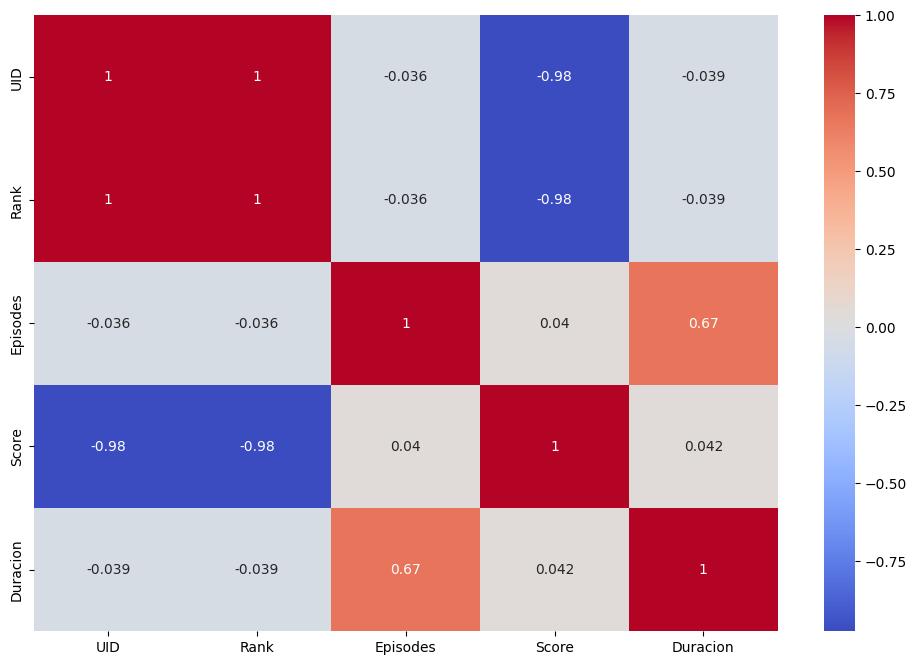

In [54]:

matriz_int = df_int.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_int, annot=True, cmap="coolwarm")

In [57]:
df.head()

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score,Duracion,Finalizo
0,1,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,"800,615",9.35,6.0,si
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,"3,373,923",9.09,15.0,si
2,3,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,"2,584,616",9.07,5.0,si
3,4,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,"636,631",9.06,11.0,si
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,"2,305,044",9.05,3.0,si


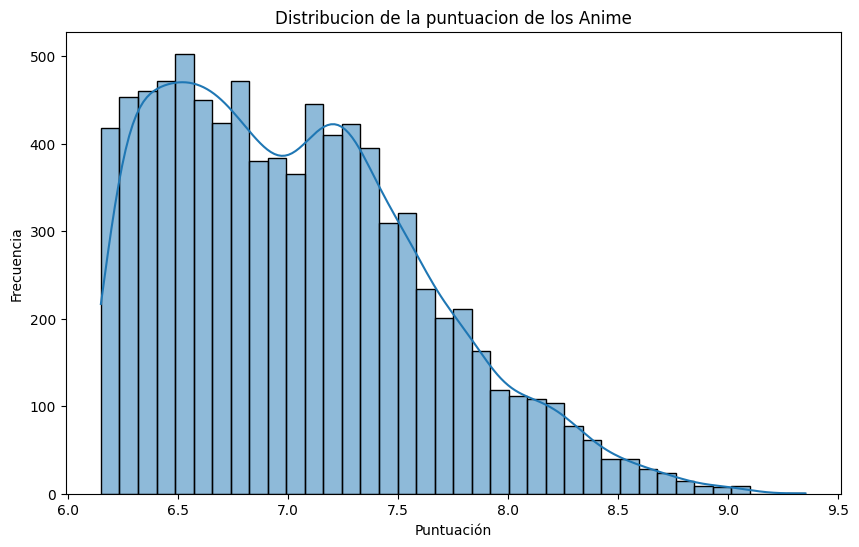

In [67]:
#Histogramas 

plt.figure(figsize=(10, 6))
sns.histplot( df["Score"] , kde=True )
plt.title("Distribucion de la puntuacion de los Anime")
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')
plt.show()




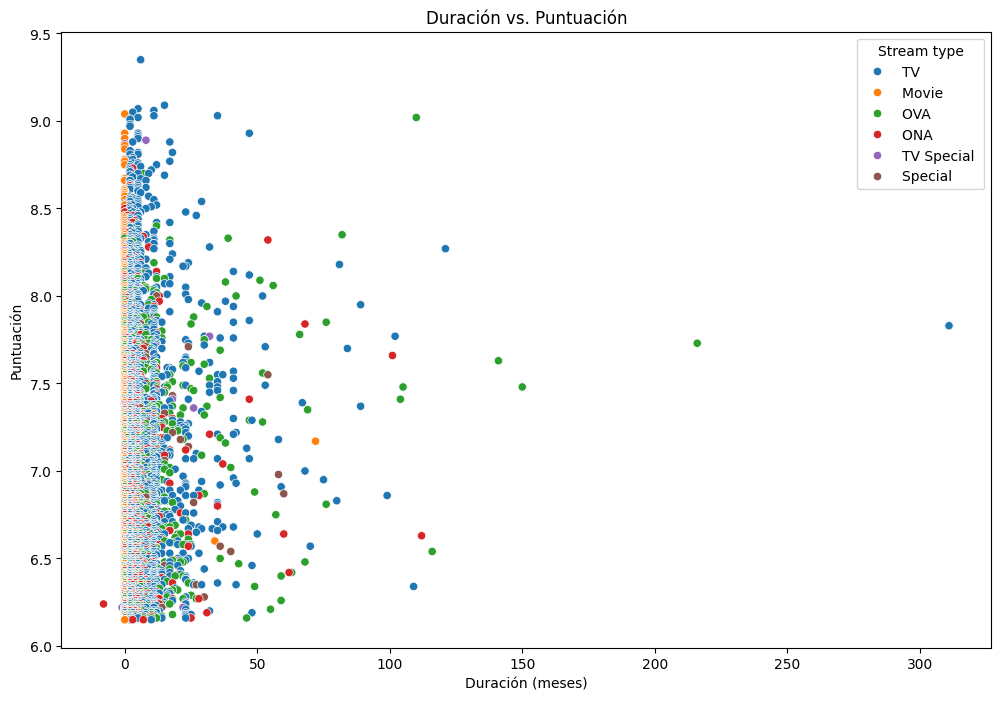

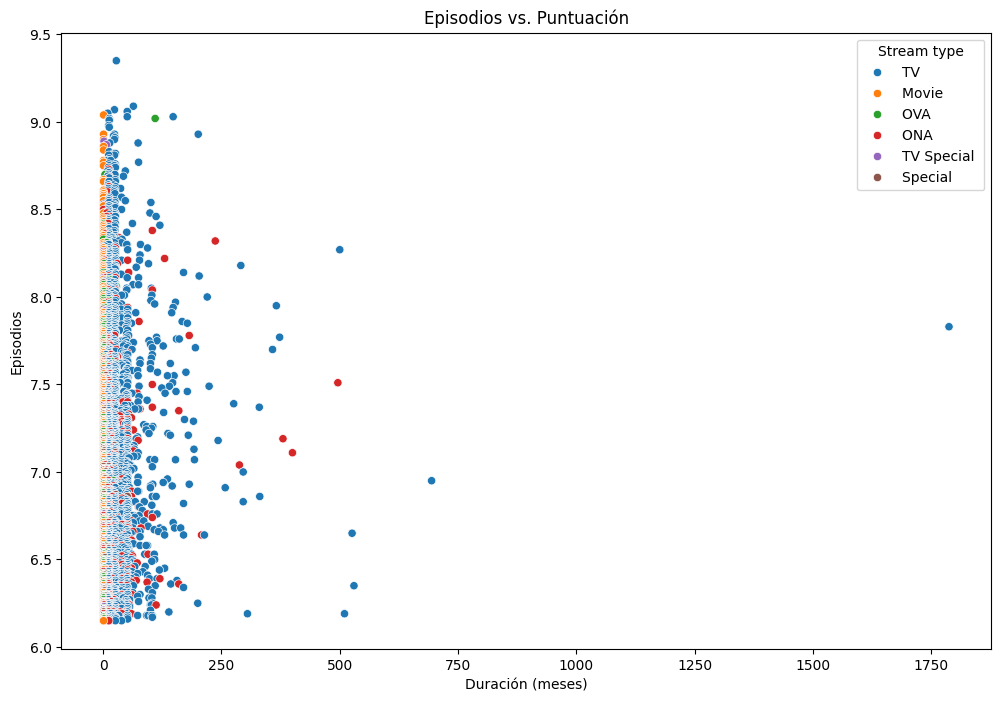

In [79]:

# Graficos dos variables numericas comparacion

# Duracion vs Score
plt.figure(figsize=(12,8))
sns.scatterplot(x="Duracion", y="Score", hue="Stream type", data=df)
plt.title('Duración vs. Puntuación')
plt.xlabel('Duración (meses)')
plt.ylabel('Puntuación')
plt.legend(title='Stream type')
plt.show()


# Episodios vs Puntuacion
plt.figure(figsize=(12,8))
sns.scatterplot(x="Episodes", y="Score", hue="Stream type", data=df)
plt.title('Episodios vs. Puntuación')
plt.xlabel('Duración (meses)')
plt.ylabel('Episodios')
plt.legend(title='Stream type')
plt.show()


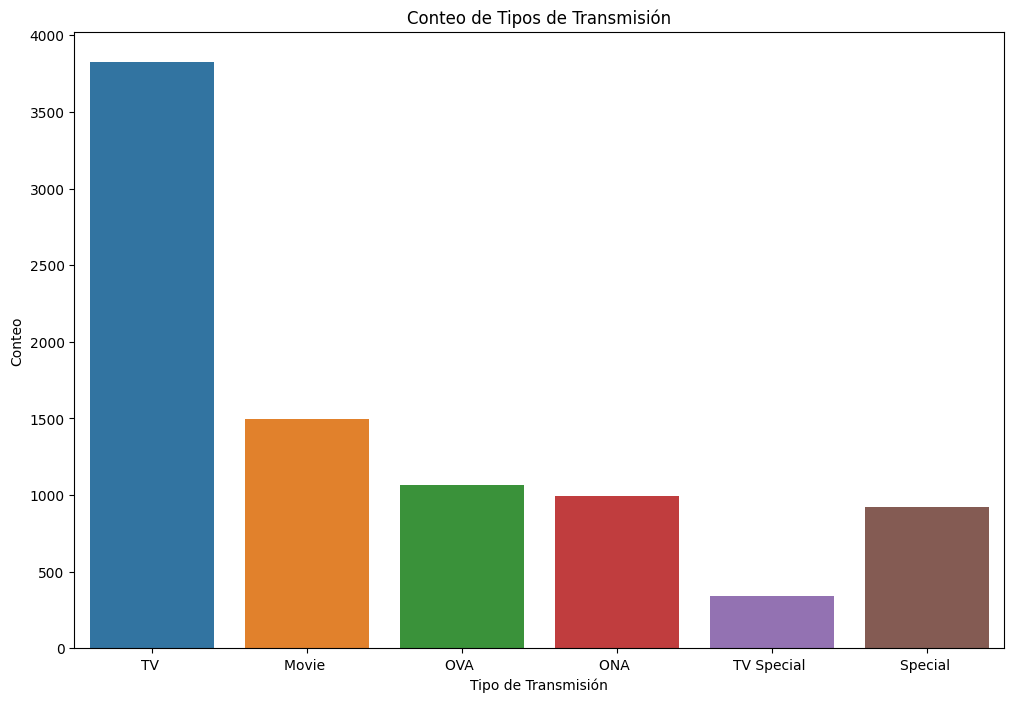

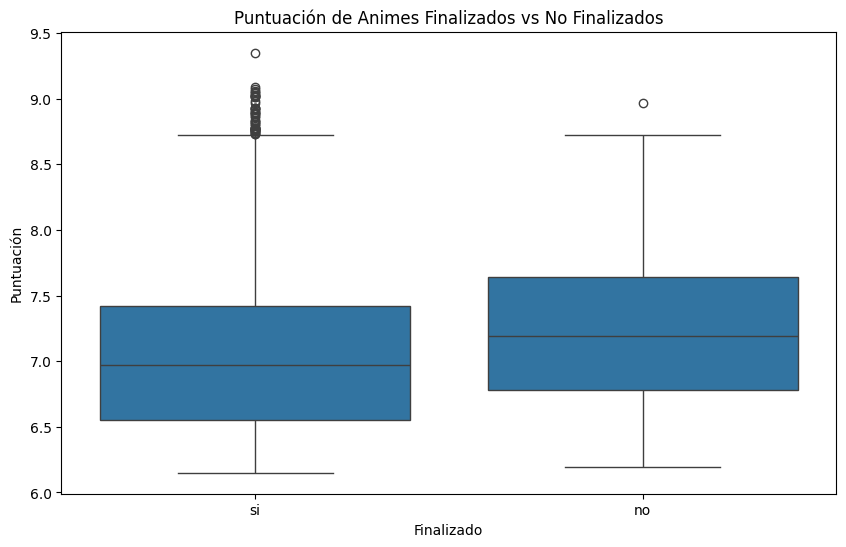

In [99]:


# conteo por tipos de transmision

plt.figure(figsize=(12,8))
sns.countplot(x="Stream type", data=df, hue="Stream type")
plt.title('Conteo de Tipos de Transmisión')
plt.xlabel('Tipo de Transmisión')
plt.ylabel('Conteo')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Finalizo', y='Score')
plt.title('Puntuación de Animes Finalizados vs No Finalizados')
plt.xlabel('Finalizado')
plt.ylabel('Puntuación')
plt.show()
